In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import (RocCurveDisplay, PrecisionRecallDisplay,
                             ConfusionMatrixDisplay,
                             mean_squared_error, r2_score)

In [2]:
data=pd.read_csv(r"uci_credit_card.csv")

In [3]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

📊 EDA

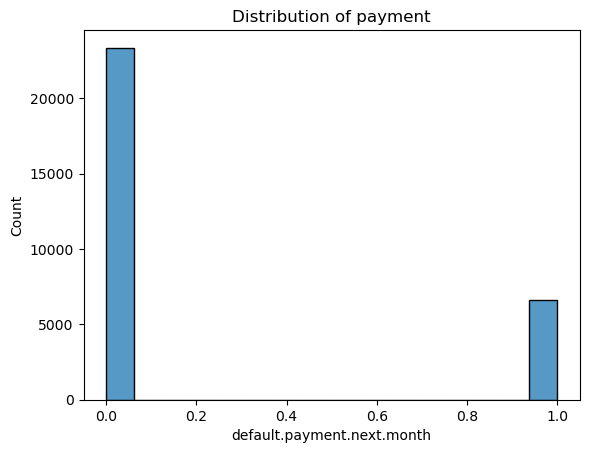

In [6]:
plt.Figure(figsize=(1000,500))
sns.histplot(data=data , x="default.payment.next.month")
plt.title("Distribution of payment")
plt.show()


In [7]:
data["SEX"].replace({
    "1":"Male",
    "2":"Female"
})

0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64

In [8]:
data["default.payment.next.month"].replace({
    "1":"Yes",
    "0":"No"
})

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#default.payment.next.month= D.P.N.M
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['SEX'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['default.payment.next.month'].value_counts(), name="D.P.N.M"),
              1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and D.P.N.M Distributions",

    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='D.P.N.M', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

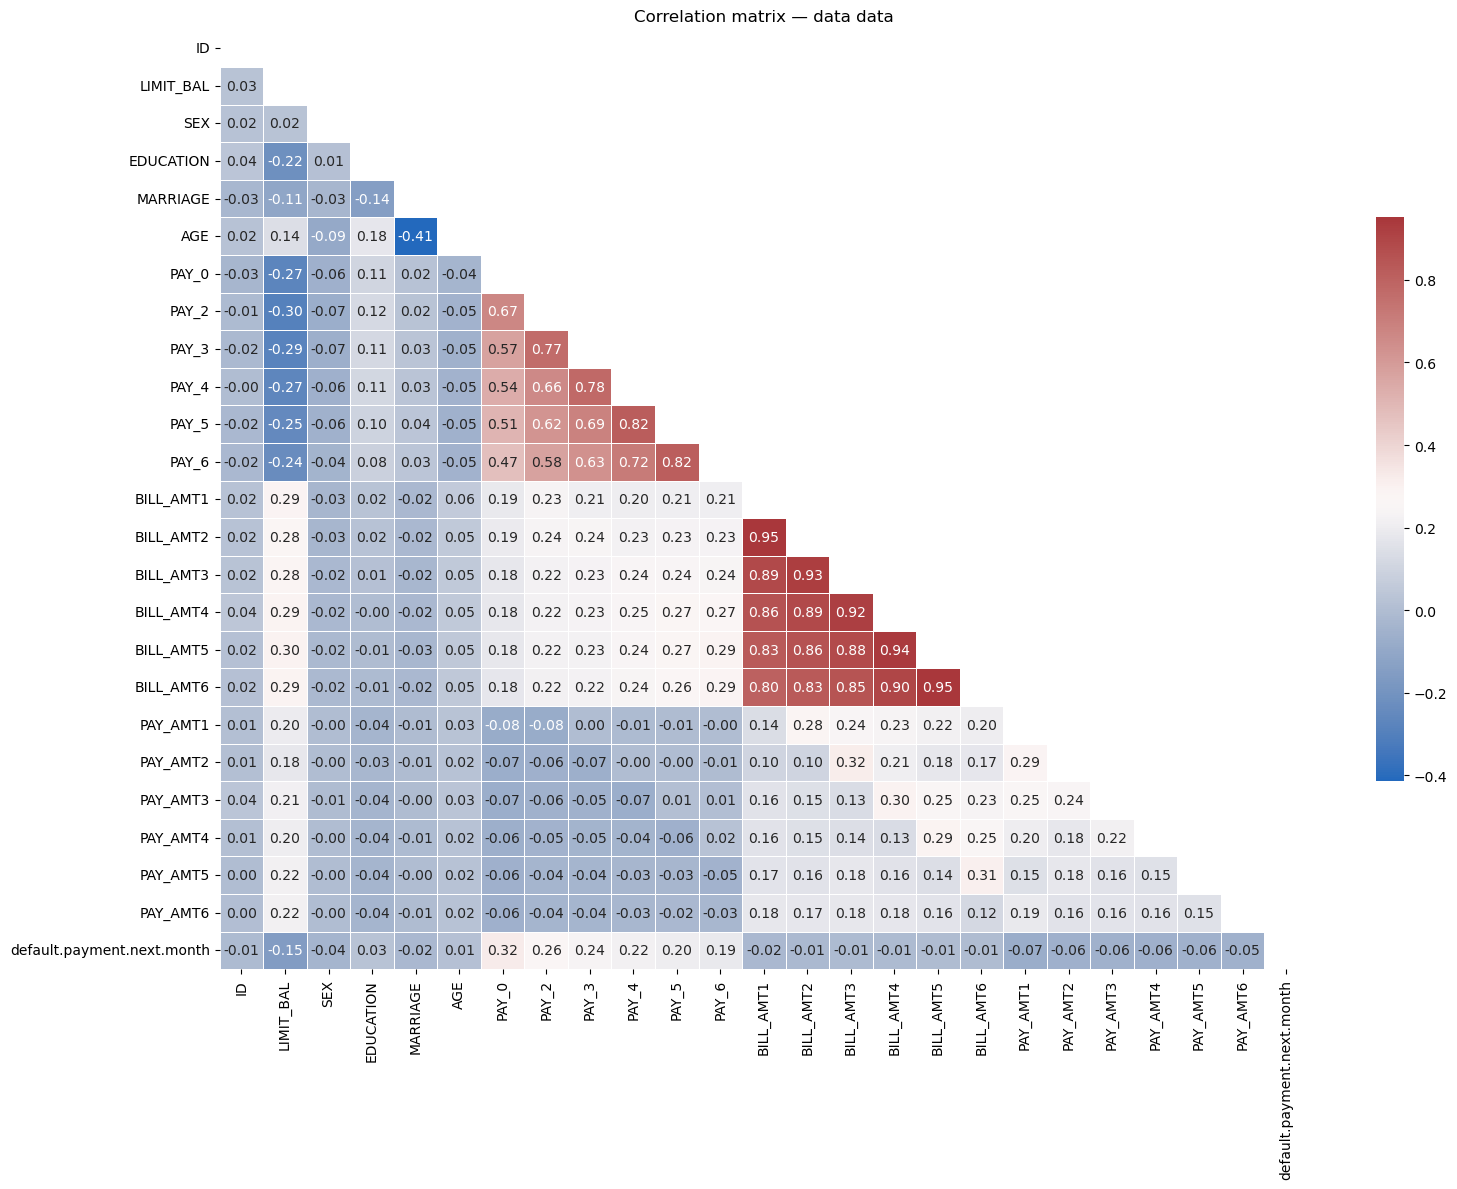

In [10]:
plt.figure(figsize=(16,12))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="vlag", linewidths=.5, cbar_kws={"shrink":.6})
plt.title("Correlation matrix — data data")
plt.tight_layout()
plt.show()


,count,default_rate
PAY_0,,
0,14737,0.128113
-1,5686,0.167781
1,3688,0.339479
-2,2759,0.132294
2,2667,0.691414
3,322,0.757764
4,76,0.684211
5,26,0.500000
8,19,0.578947


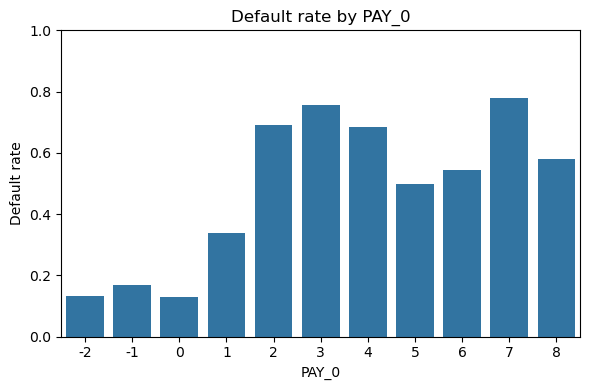

,count,default_rate
PAY_2,,
0,15730,0.159123
-1,6050,0.159669
2,3927,0.556150
-2,3782,0.182708
3,326,0.616564
4,99,0.505051
1,28,0.178571
5,25,0.600000
7,20,0.600000


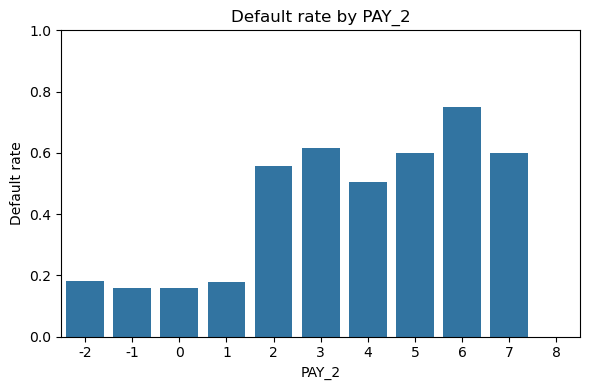

,count,default_rate
PAY_3,,
0,15764,0.174512
-1,5938,0.155945
-2,4085,0.185312
2,3819,0.515580
3,240,0.575000
4,76,0.578947
7,27,0.814815
6,23,0.608696
5,21,0.571429


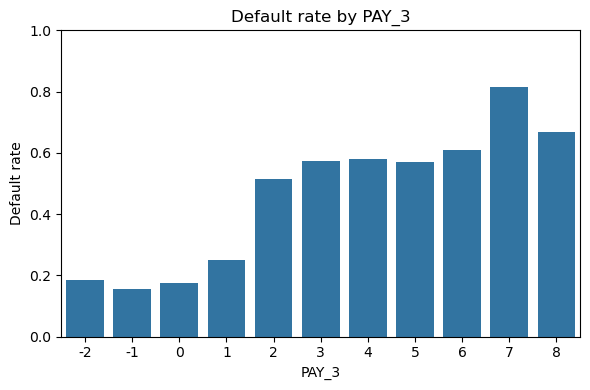

,count,default_rate
PAY_4,,
0,16455,0.183288
-1,5687,0.158959
-2,4348,0.192502
2,3159,0.523267
3,180,0.611111
4,69,0.666667
7,58,0.827586
5,35,0.514286
6,5,0.400000


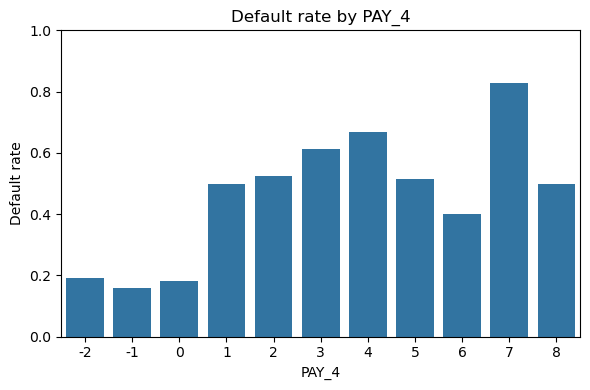

,count,default_rate
PAY_5,,
0,16947,0.188529
-1,5539,0.161943
-2,4546,0.196876
2,2626,0.541889
3,178,0.634831
4,84,0.607143
7,58,0.827586
5,17,0.588235
6,4,0.750000


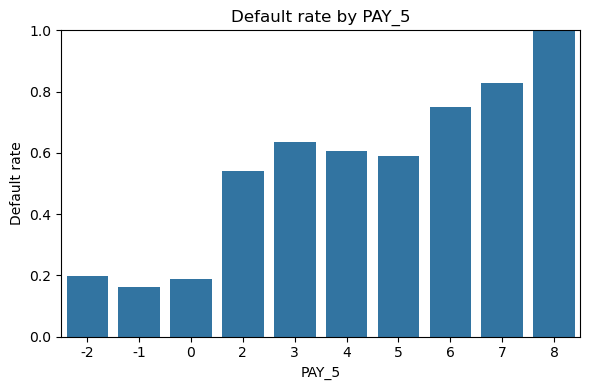

,count,default_rate
PAY_6,,
0,16286,0.188444
-1,5740,0.169861
-2,4895,0.200409
2,2766,0.506508
3,184,0.641304
4,49,0.632653
7,46,0.826087
6,19,0.736842
5,13,0.538462


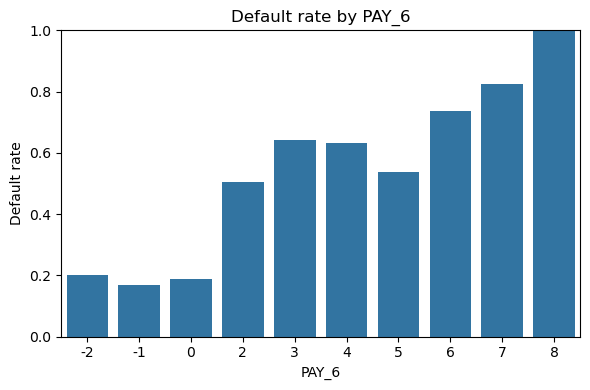

In [11]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for col in pay_cols:
    table = data.groupby(col)['default.payment.next.month'].agg(['count','mean']).rename(columns={'mean':'default_rate'})
    display(table.sort_values('count', ascending=False).head(12))  # تبص على أشهر القيم
    plt.figure(figsize=(6,4))
    sns.barplot(x=table.index, y=table['default_rate'])
    plt.title(f'Default rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Default rate')
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()


default.payment.next.month             0             1
BILL_AMT1 mean              51994.227273  48509.162297
          median            23119.500000  20185.000000
BILL_AMT2 mean              49717.435670  47283.617842
          median            21660.500000  20300.500000
BILL_AMT3 mean              47533.365605  45181.598855
          median            20202.500000  19834.500000
BILL_AMT4 mean              43611.165254  42036.950573
          median            19000.000000  19119.500000
BILL_AMT5 mean              40530.445343  39540.190476
          median            17998.000000  18478.500000
BILL_AMT6 mean              39042.268704  38271.435503
          median            16679.000000  18028.500000
PAY_AMT1  mean               6307.337357   3397.044153
          median             2459.500000   1636.000000
PAY_AMT2  mean               6640.465074   3388.649638
          median             2247.500000   1533.500000
PAY_AMT3  mean               5753.496833   3367.351567
          median             2000.000000   1222.000000
PAY_AMT4  mean               5300.529319   3155.626733
          median             1734.000000   1000.000000

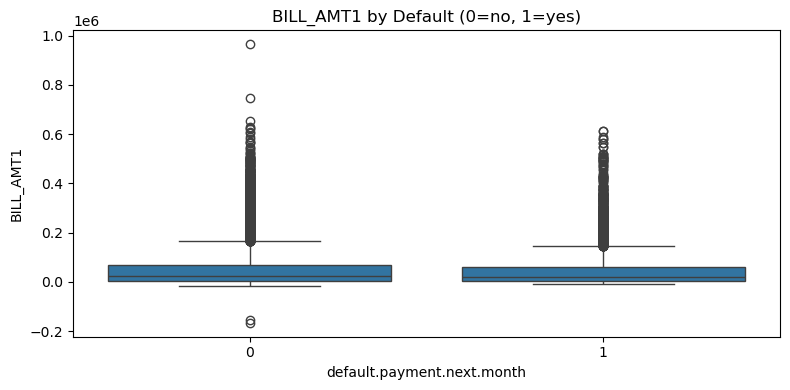

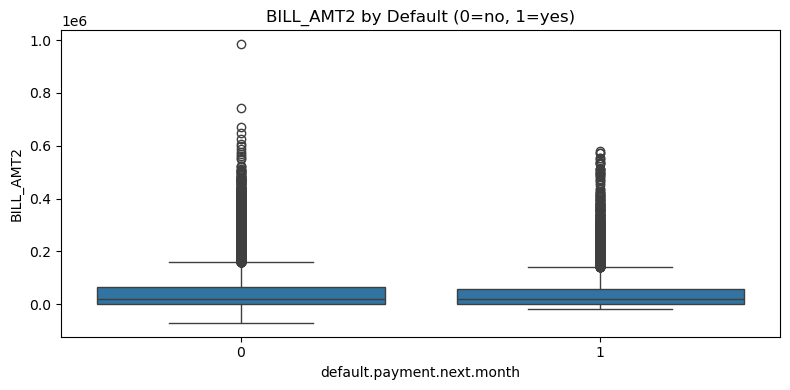

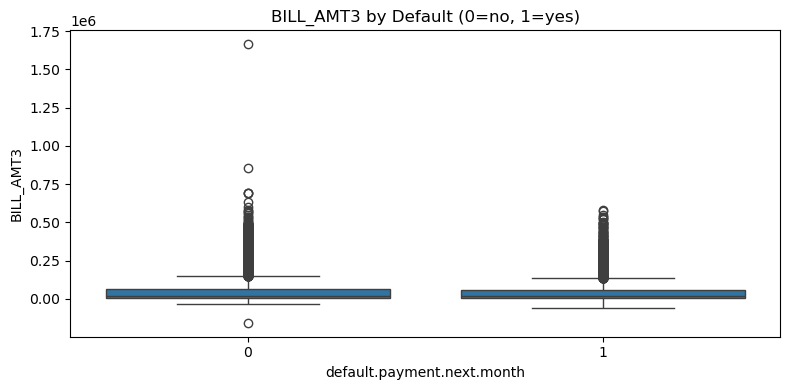

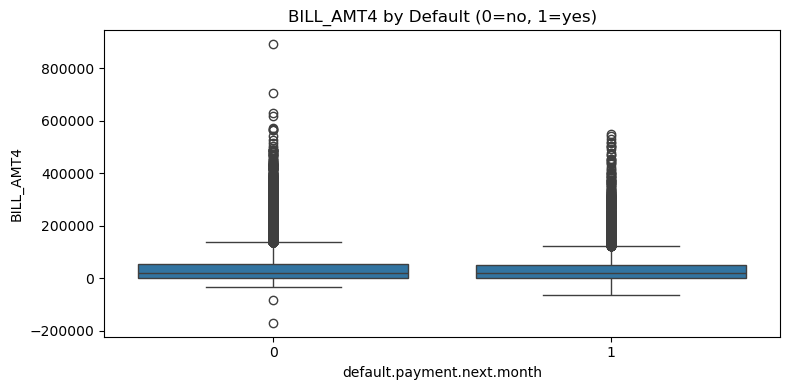

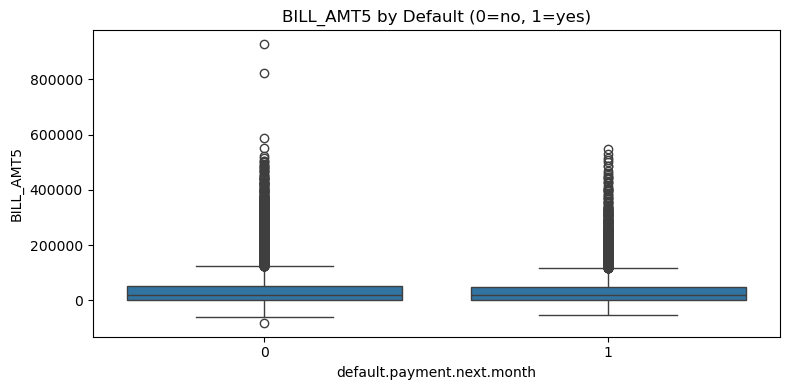

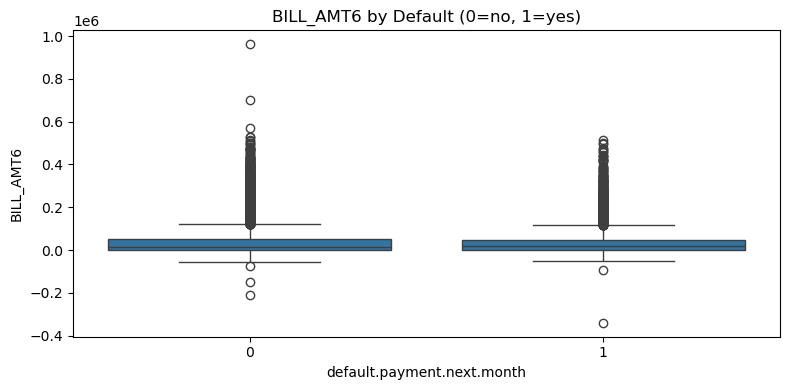

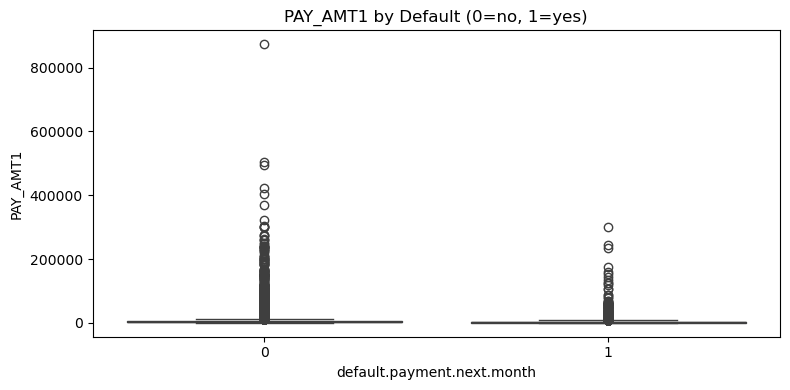

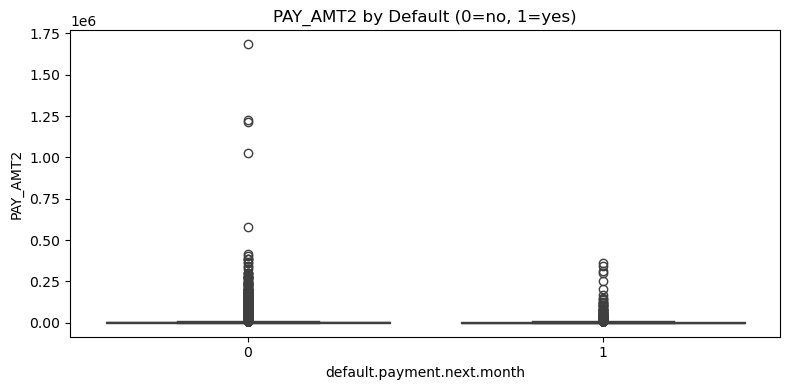

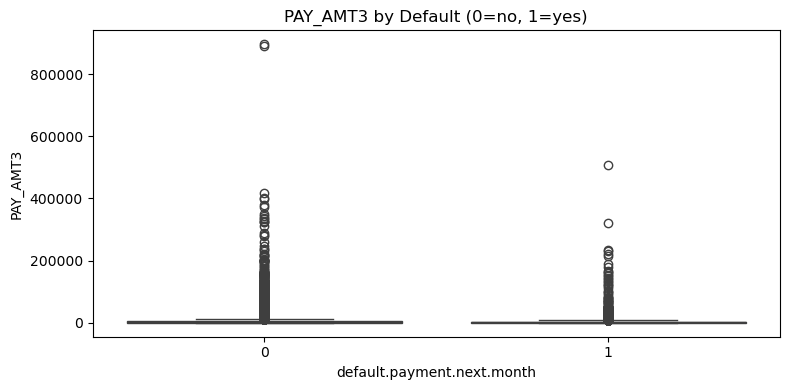

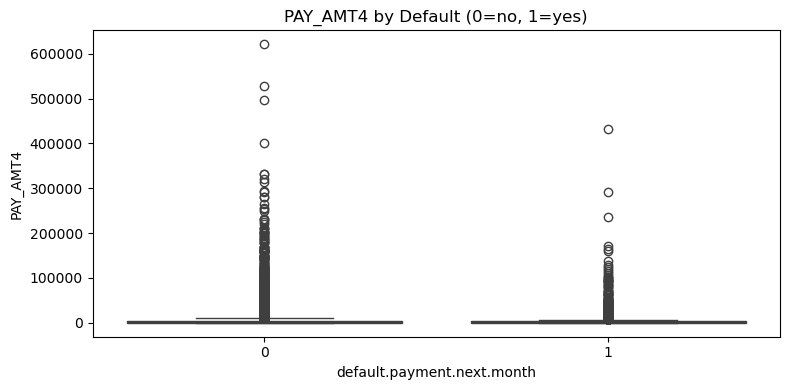

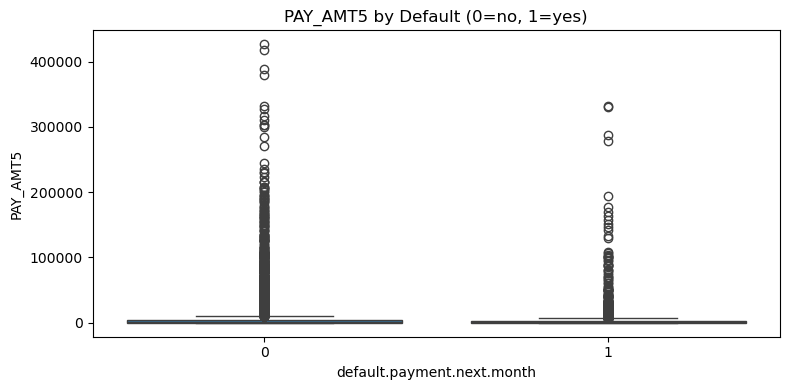

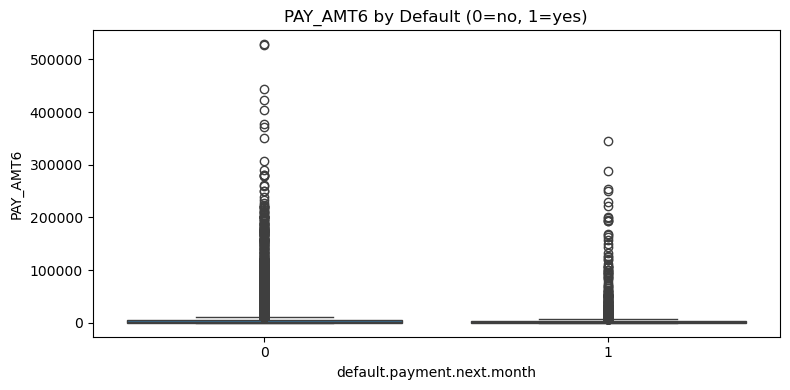

In [12]:
bill_cols = [f'BILL_AMT{i}' for i in range(1,7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1,7)]


summary = data.groupby('default.payment.next.month')[bill_cols + pay_amt_cols].agg(['mean','median']).transpose()
display(summary.head(20))

# Boxplots 
for col in bill_cols + pay_amt_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='default.payment.next.month', y=col, data=data)
    plt.title(f'{col} by Default (0=no, 1=yes)')
    plt.tight_layout()
    plt.show()


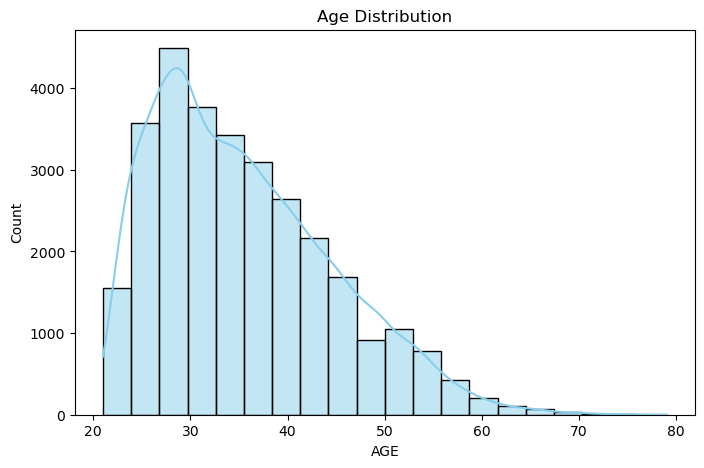

In [13]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data['AGE'], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")
plt.show()

In [14]:
# Gender distribution
fig = px.histogram(data, x="SEX", color="default.payment.next.month", barmode="group",
                   title="Gender Distribution by ASD Class")
fig.show()

D:\Temp\ipykernel_9536\3927731484.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




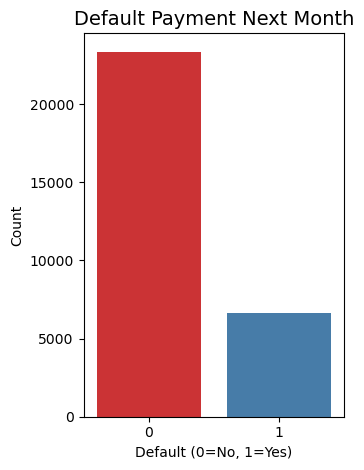

In [15]:
# Default distribution
plt.subplot(1, 2, 2)
sns.countplot(data=data, x="default.payment.next.month", palette="Set1")
plt.title("Default Payment Next Month", fontsize=14)
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

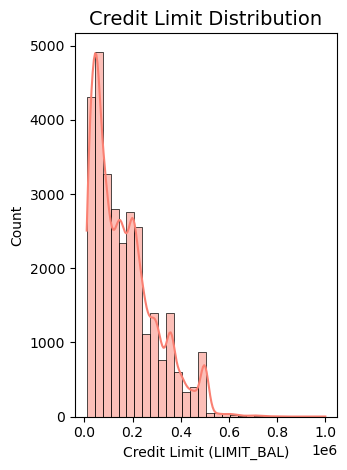

In [16]:
# Credit Limit distribution
plt.subplot(1,2,2)
sns.histplot(data["LIMIT_BAL"], bins=30, kde=True, color="salmon")
plt.title("Credit Limit Distribution", fontsize=14)
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

D:\Temp\ipykernel_9536\1099266611.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




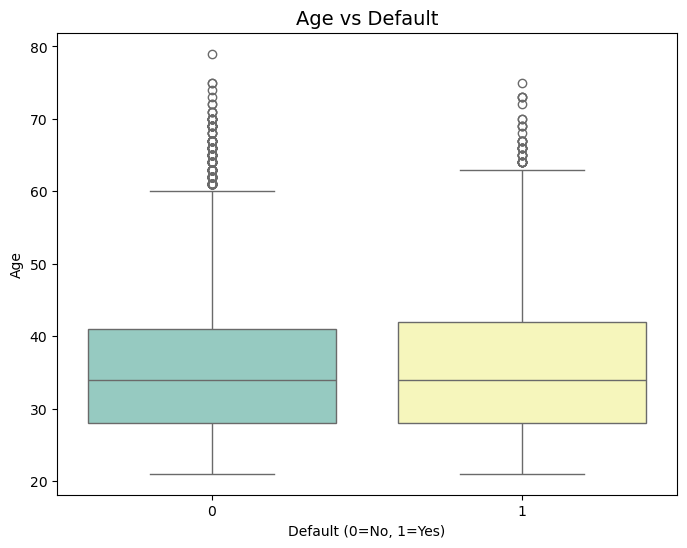

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x="default.payment.next.month", y="AGE", data=data, palette="Set3")
plt.title("Age vs Default", fontsize=14)
plt.xlabel("Default (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()


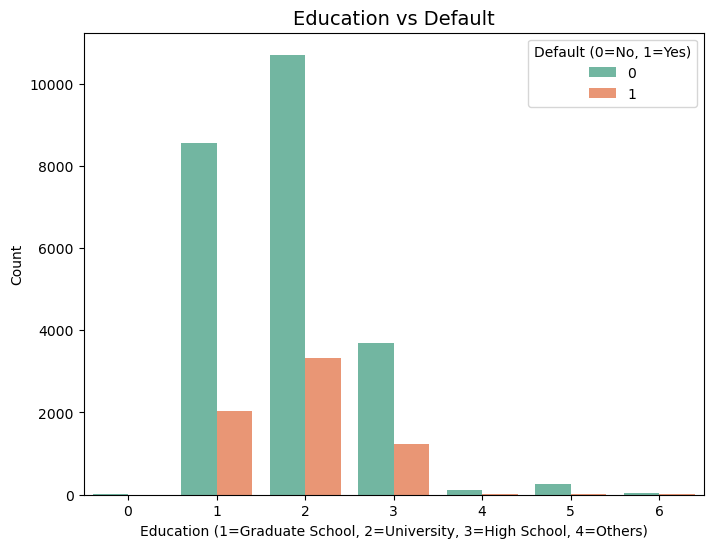

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=data, palette="Set2")
plt.title("Education vs Default", fontsize=14)
plt.xlabel("Education (1=Graduate School, 2=University, 3=High School, 4=Others)")
plt.ylabel("Count")
plt.legend(title="Default (0=No, 1=Yes)")
plt.show()


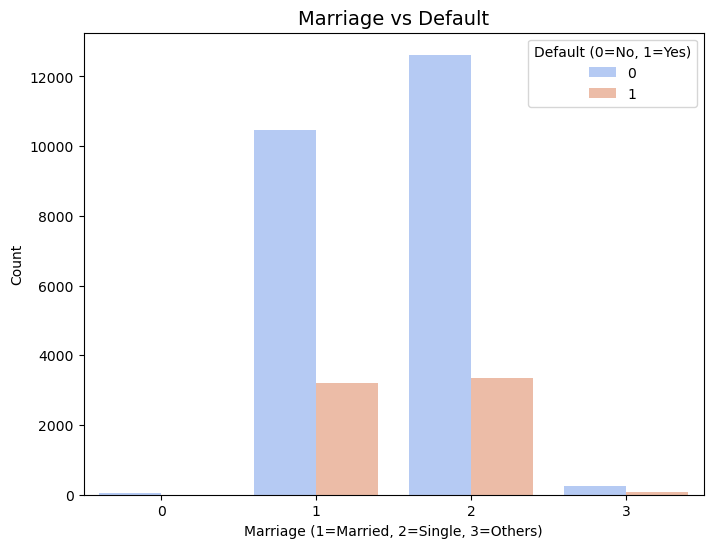

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=data, palette="coolwarm")
plt.title("Marriage vs Default", fontsize=14)
plt.xlabel("Marriage (1=Married, 2=Single, 3=Others)")
plt.ylabel("Count")
plt.legend(title="Default (0=No, 1=Yes)")
plt.show()


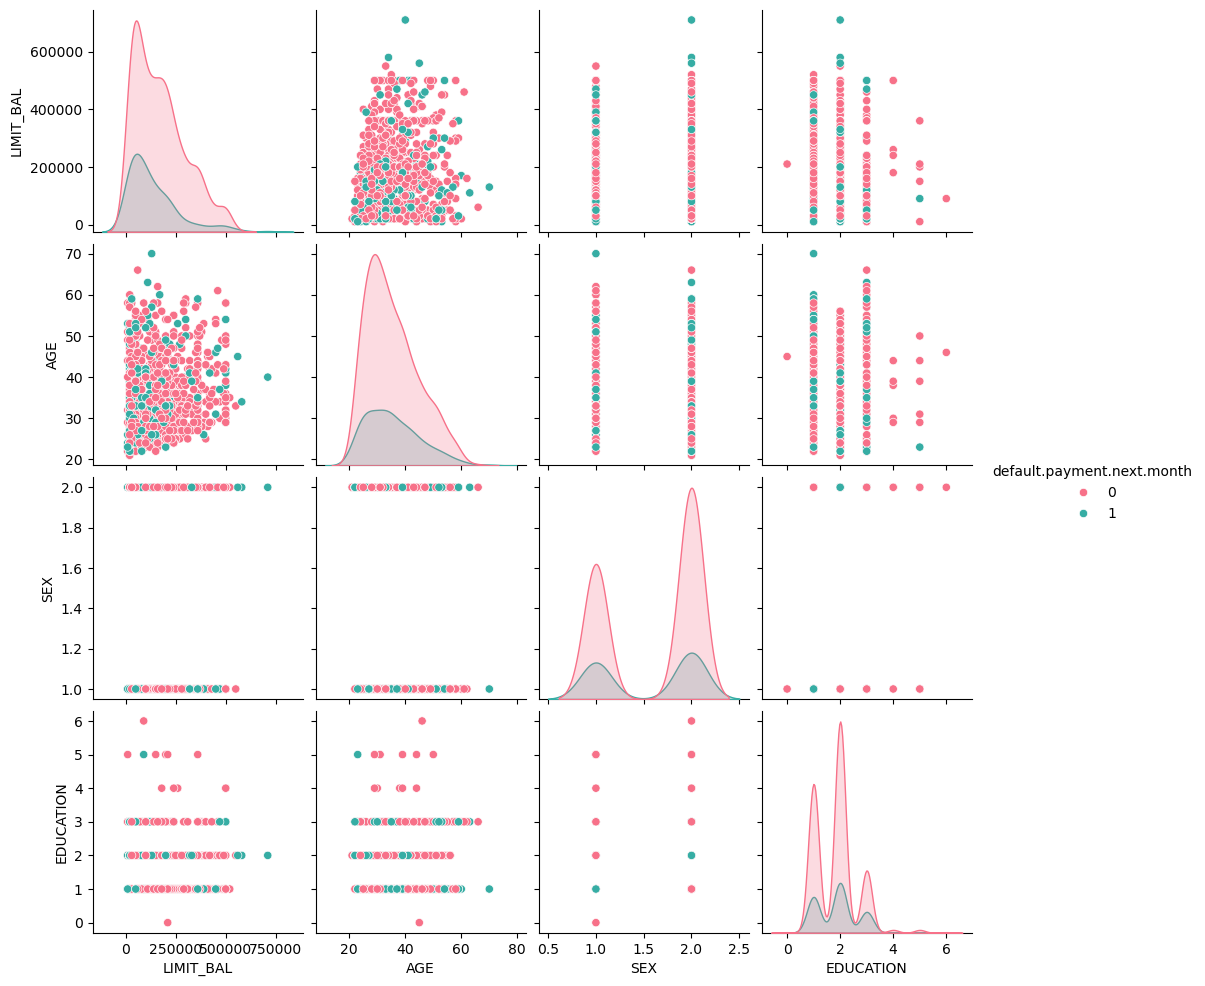

In [20]:
sample = data.sample(1000, random_state=42)
sns.pairplot(sample[["LIMIT_BAL", "AGE", "SEX", "EDUCATION", "default.payment.next.month"]],
             hue="default.payment.next.month", diag_kind="kde", palette="husl")
plt.show()


 These visualizations will give you:

General distributions (Age, Credit Limit, Gender, Default).

Relationships between categorical features (Gender, Education, Marriage) and default.

Correlation overview with heatmap.

Pairwise relationships with pairplot.

Data PreProcessing

In [21]:
print("Counts:")
print(data['default.payment.next.month'].value_counts())
print("\nRelative frequencies:")
print(data['default.payment.next.month'].value_counts(normalize=True))


Counts:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

Relative frequencies:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [22]:
pay_corr = corr.loc[pay_cols + bill_cols + pay_amt_cols, 'default.payment.next.month'].sort_values(ascending=False)
print("Top correlated features with default:")
display(pay_corr.head(20))


Top correlated features with default:


PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
Name: default.payment.next.month, dtype: float64

In [23]:
# Remove duplicate rows if any
data.drop_duplicates(inplace=True)

In [24]:
data=data.drop(["ID"] , axis=1)

In [25]:
scaler =  StandardScaler()
# Select numeric columns for scaling
num_cols = ["LIMIT_BAL", "AGE"] + [col for col in data.columns if "BILL_AMT" in col or "PAY_AMT" in col]

data[num_cols] = scaler.fit_transform(data[num_cols])
data["default.payment.next.month"] = LabelEncoder().fit_transform(data["default.payment.next.month"])

categorical_cols = ["SEX", "EDUCATION", "MARRIAGE"]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [26]:

y=data["default.payment.next.month"]
x=data.drop(["default.payment.next.month"] , axis=1)
features = x.columns
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 , stratify=y)
x_train.shape  ,y_train.shape


((24000, 30), (24000,))

In [27]:
x.shape

(30000, 30)

✅Data Preprocessing:

Remove duplicates

Encode categorical variables

Scale numerical values

Train-test split

Handle class imbalance


========== BEFORE SMOTE ==========

RandomForestClassifier (Before SMOTE)
RandomForestClassifier - Accuracy: 0.8135
              precision    recall  f1-score   support

           0      0.835     0.947     0.888      4673
           1      0.649     0.342     0.448      1327

    accuracy                          0.814      6000
   macro avg      0.742     0.645     0.668      6000
weighted avg      0.794     0.814     0.791      6000



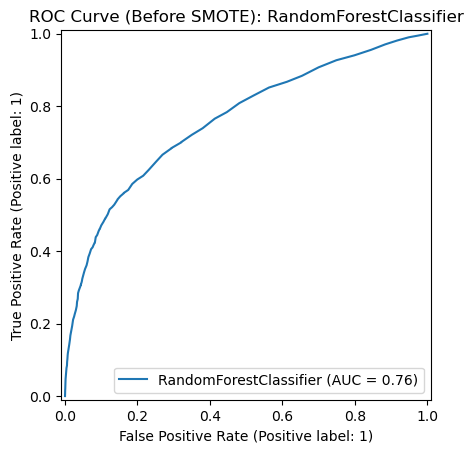

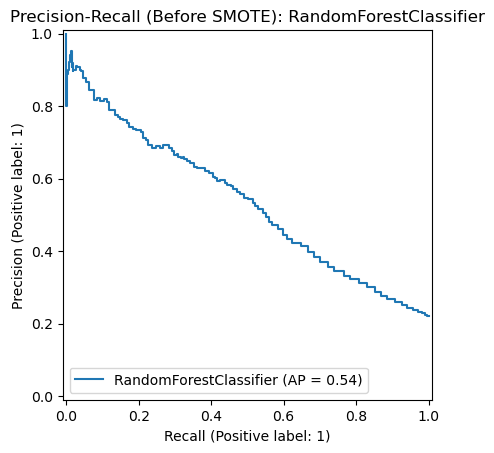

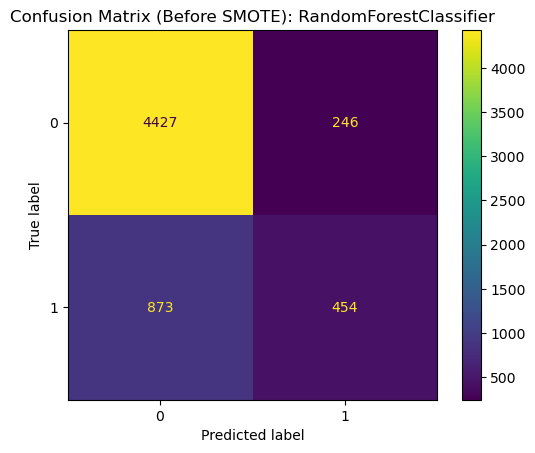

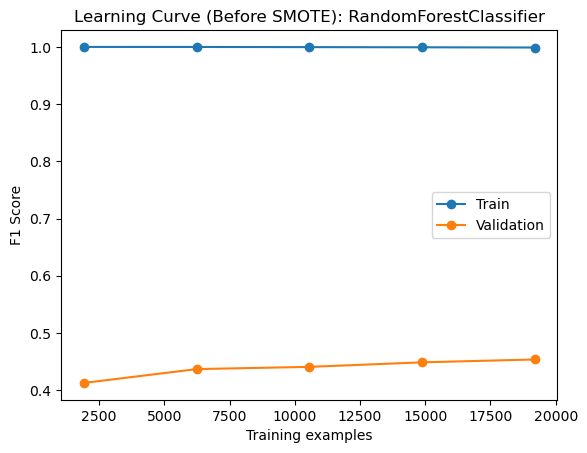


GradientBoostingClassifier (Before SMOTE)
GradientBoostingClassifier - Accuracy: 0.8188
              precision    recall  f1-score   support

           0      0.840     0.948     0.891      4673
           1      0.666     0.363     0.470      1327

    accuracy                          0.819      6000
   macro avg      0.753     0.656     0.680      6000
weighted avg      0.801     0.819     0.798      6000



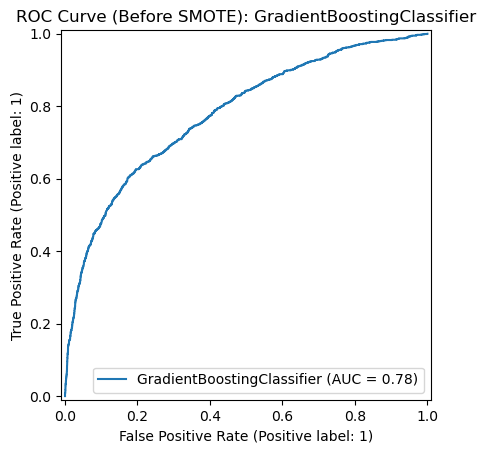

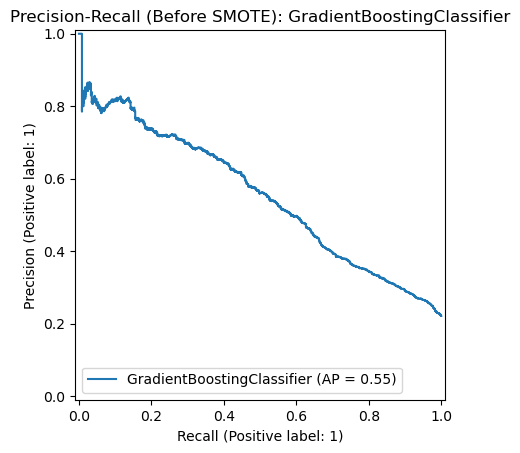

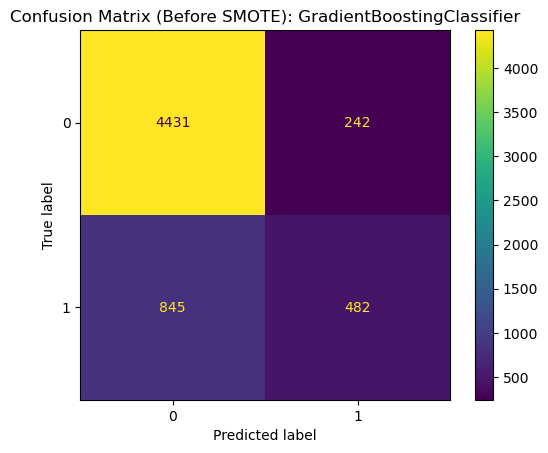

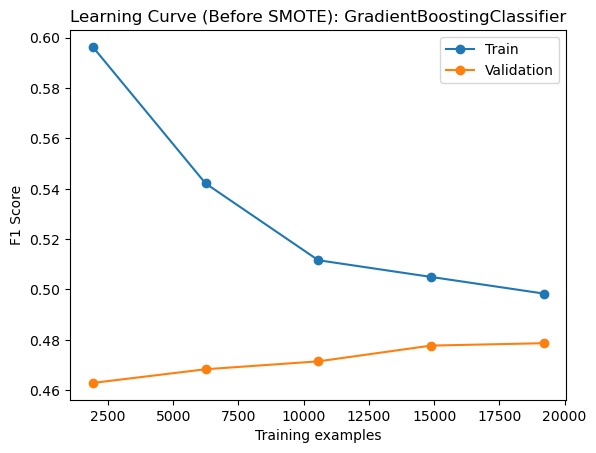


LogisticRegression (Before SMOTE)
LogisticRegression - Accuracy: 0.6783
              precision    recall  f1-score   support

           0      0.869     0.691     0.770      4673
           1      0.368     0.632     0.465      1327

    accuracy                          0.678      6000
   macro avg      0.618     0.662     0.618      6000
weighted avg      0.758     0.678     0.703      6000



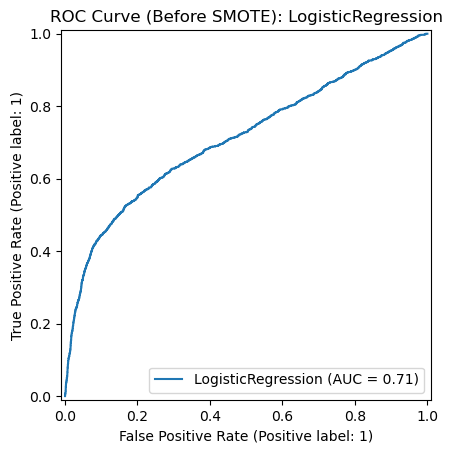

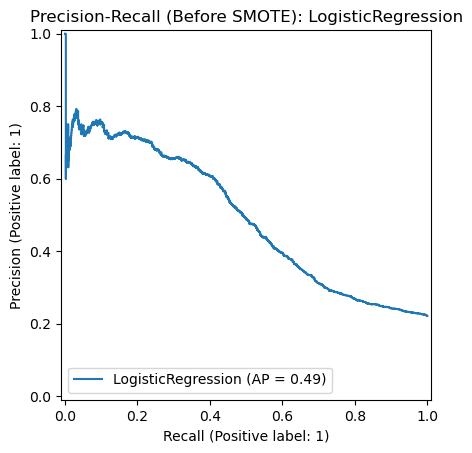

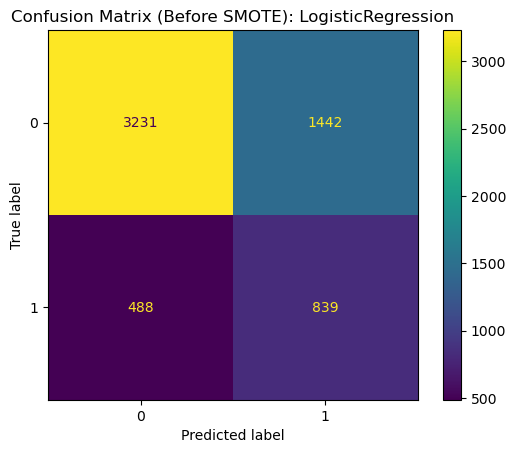

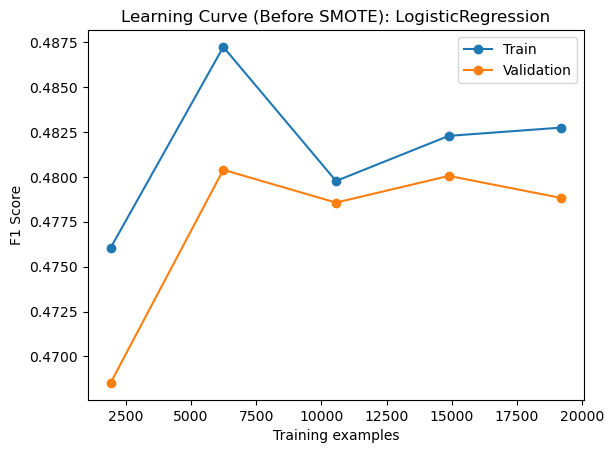


========== AFTER SMOTE ==========

RandomForestClassifier (After SMOTE)
RandomForestClassifier - Accuracy: 0.7953
              precision    recall  f1-score   support

           0      0.855     0.888     0.871      4673
           1      0.543     0.470     0.504      1327

    accuracy                          0.795      6000
   macro avg      0.699     0.679     0.688      6000
weighted avg      0.786     0.795     0.790      6000



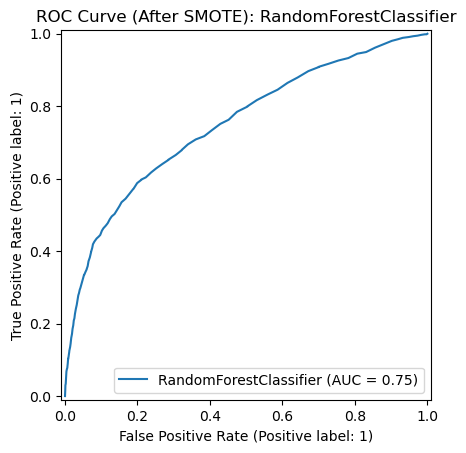

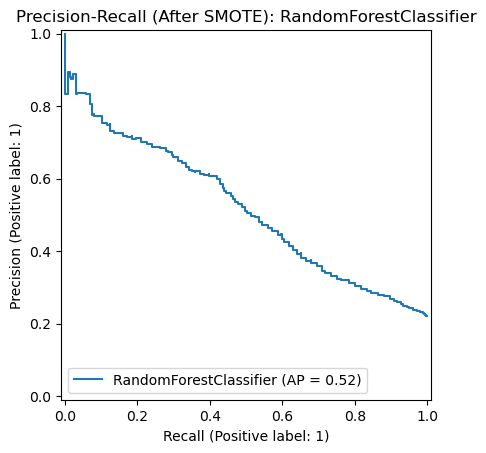

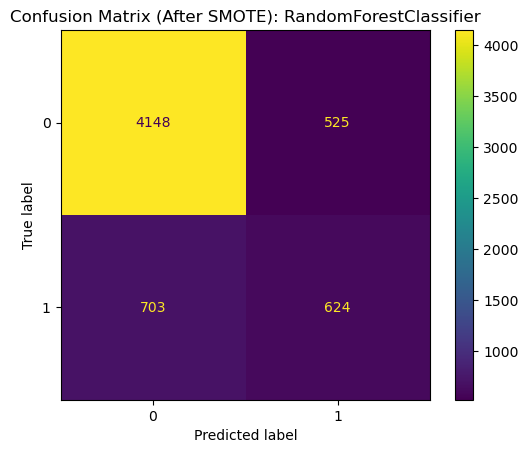

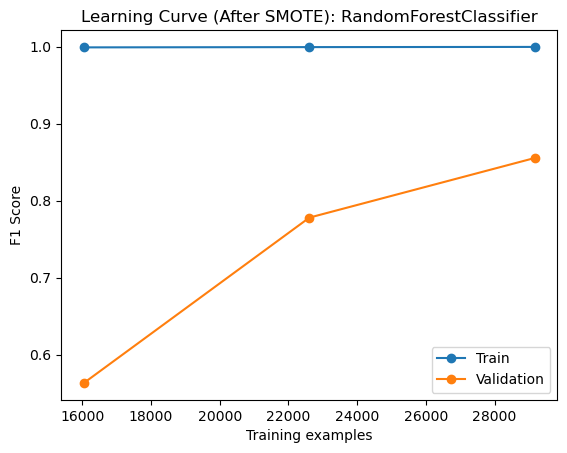


GradientBoostingClassifier (After SMOTE)
GradientBoostingClassifier - Accuracy: 0.7957
              precision    recall  f1-score   support

           0      0.860     0.880     0.870      4673
           1      0.541     0.497     0.518      1327

    accuracy                          0.796      6000
   macro avg      0.701     0.689     0.694      6000
weighted avg      0.790     0.796     0.792      6000



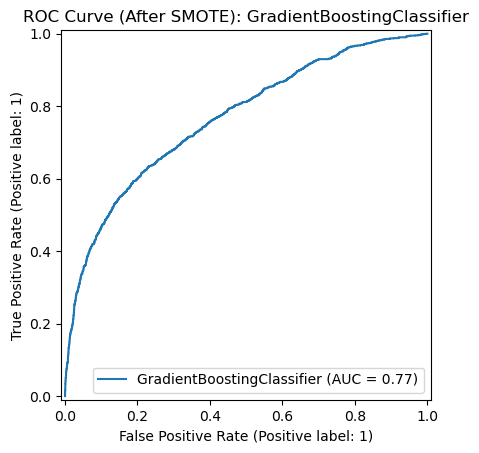

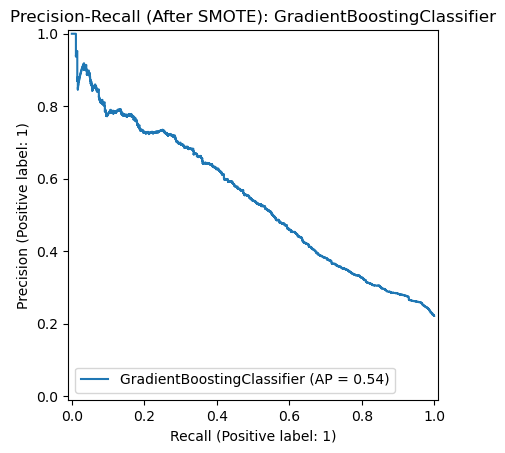

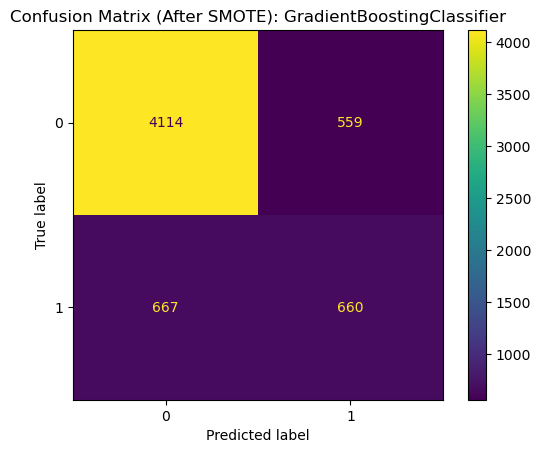

c:\Users\moham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\moham\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\moham\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 669, in fit
    y = self._encode_y(y=y

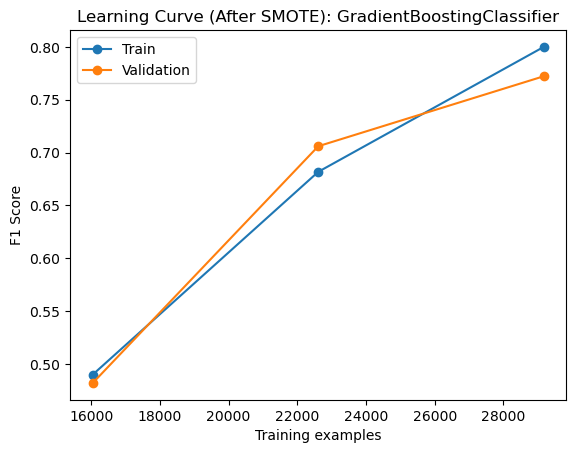


LogisticRegression (After SMOTE)
LogisticRegression - Accuracy: 0.6667
              precision    recall  f1-score   support

           0      0.869     0.674     0.759      4673
           1      0.358     0.642     0.460      1327

    accuracy                          0.667      6000
   macro avg      0.614     0.658     0.609      6000
weighted avg      0.756     0.667     0.693      6000



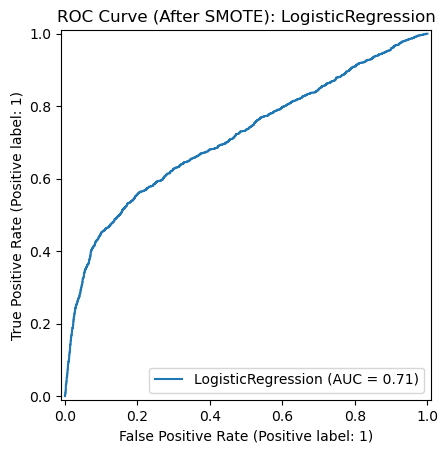

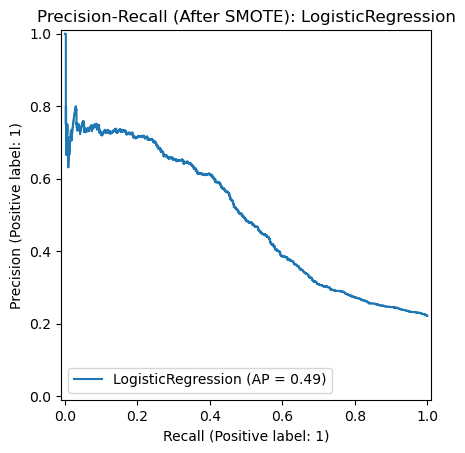

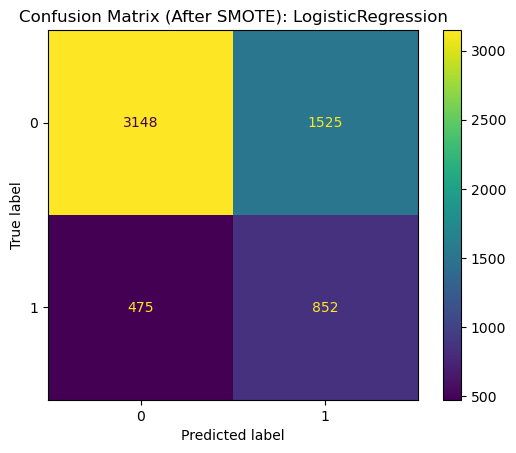

c:\Users\moham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\moham\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\moham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1276, in fit
    self.coef_,

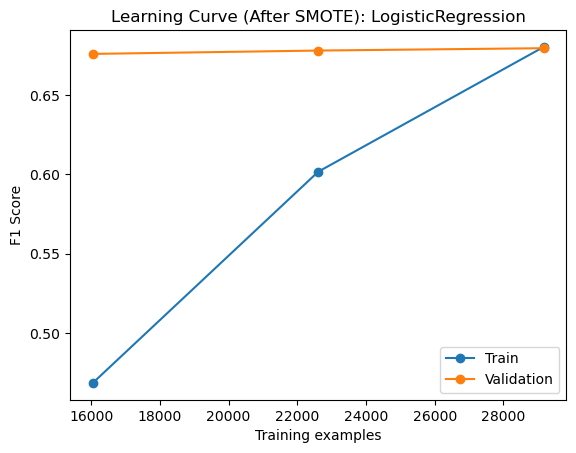

In [28]:
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Define models
# -------------------------
models = {
    "RandomForestClassifier": RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=100),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "LogisticRegression": LogisticRegression(class_weight="balanced", random_state=42, max_iter=500, solver="liblinear")
}

# -------------------------
# Helper function to train & evaluate
# -------------------------
def evaluate_models(models, X_train, y_train, X_test, y_test, phase="Before SMOTE"):
    print(f"\n========== {phase.upper()} ==========")
    
    for name, model in models.items():
        print(f"\n{name} ({phase})")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} - Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred, digits=3))

        # Visualizations
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f"ROC Curve ({phase}): {name}")
        plt.show()

        PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
        plt.title(f"Precision-Recall ({phase}): {name}")
        plt.show()

        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
        plt.title(f"Confusion Matrix ({phase}): {name}")
        plt.show()
       

        # Learning curve
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_train, y_train, cv=5, scoring='f1',
            train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
        )
        plt.plot(train_sizes, train_scores.mean(axis=1), marker='o', label='Train')
        plt.plot(train_sizes, val_scores.mean(axis=1), marker='o', label='Validation')
        plt.xlabel('Training examples')
        plt.ylabel('F1 Score')
        plt.title(f'Learning Curve ({phase}): {name}')
        plt.legend()
        plt.show()


# -------------------------
# 1) Before SMOTE
# -------------------------
evaluate_models(models, x_train, y_train, x_test, y_test, phase="Before SMOTE")

# -------------------------
# 2) After SMOTE
# -------------------------
smt = SMOTETomek(random_state=42)
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

evaluate_models(models, x_train_sm, y_train_sm, x_test, y_test, phase="After SMOTE")



In [29]:

model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[30]),
    
    tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)

In [30]:
# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

model1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

hist = model1.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_schedule]
)

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7397 - loss: 0.5987 - val_accuracy: 0.7977 - val_loss: 0.4769 - learning_rate: 0.0010
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8011 - loss: 0.4847 - val_accuracy: 0.7998 - val_loss: 0.4685 - learning_rate: 0.0010
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8061 - loss: 0.4673 - val_accuracy: 0.8012 - val_loss: 0.4645 - learning_rate: 0.0010
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8102 - loss: 0.4581 - val_accuracy: 0.7998 - val_loss: 0.4628 - learning_rate: 0.0010
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8126 - loss: 0.4509 - val_accuracy: 0.8052 - val_loss: 0.4611 - learning_rate: 0.0010
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8116 - loss: 0.4480 - val_accuracy: 0.8094 - val_loss: 0.4594 - learning_rate: 0.0010
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8119 - loss: 0.4475 - 

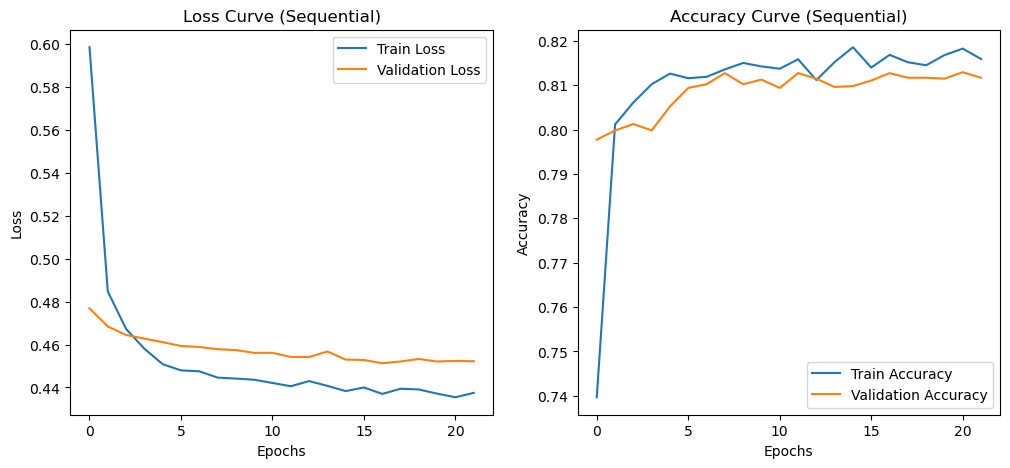

In [31]:

plt.figure(figsize=(12,5))

# Loss Curve
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='Train Loss')
if 'val_loss' in hist.history:
    plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve (Sequential)')
plt.legend()

# Accuracy Curve
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in hist.history:
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve (Sequential)')
plt.legend()

plt.show()

In [32]:
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=0)
print(f"📊 Test Accuracy: {test_acc:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

📊 Test Accuracy: 0.8165
📉 Test Loss: 0.4381


In [33]:
import joblib
best_model=GradientBoostingClassifier()
best_model.fit(x_train,y_train)
joblib.dump(best_model, "credit.pkl")




['credit.pkl']